# 일원분산(ANOVA)분석

In [9]:
import pandas as pd

In [10]:
# 데이터 불러오기 및 확인
df = pd.read_csv("datas2/지점별_일별판매량.csv", encoding='euc-kr')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일자      30 non-null     int64
 1   지점A     30 non-null     int64
 2   지점B     30 non-null     int64
 3   지점C     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [11]:
# 데이터 분할(결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점A'].dropna().values

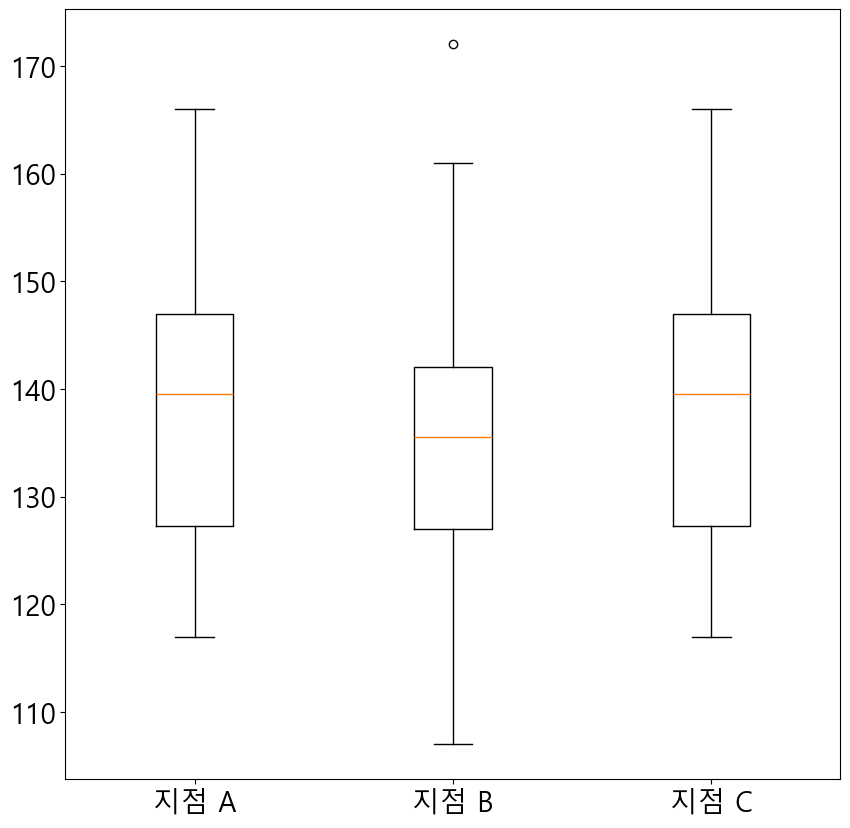

In [12]:
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])
plt.show()

## 정규성 검정
- Shapiro-Wilk 검정

In [13]:
from scipy import stats
print(stats.shapiro(A-B,))
print(stats.shapiro(A-C))
print(stats.shapiro(B-C))


ShapiroResult(statistic=np.float64(0.9806113784179772), pvalue=np.float64(0.8415709891789398))
ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0))
ShapiroResult(statistic=np.float64(0.9806113784179775), pvalue=np.float64(0.8415709891789487))


c:\Users\Admin\miniconda3\envs\eda_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


## 등분산성 검정
- 레빈 검정(Levene's Test) - 권장
- center = 'median'이 기본값이며, 평균(mean)보다 이상치에 덜 민감하여 더 안정적임

In [14]:
levene_stat, levene_p_value = stats.levene(A, B, C, center='median')
print(f"levene_stat: {levene_stat}, levene_p_value: {levene_p_value}")

levene_stat: 1.033700931234302, levene_p_value: 0.3600148275979157


## 일원분산 분석 수행

In [15]:
print(stats.f_oneway(A, B, C))

F_onewayResult(statistic=np.float64(0.11436312909110422), pvalue=np.float64(0.892067872023405))


## 사후분석

In [21]:
from statsmodels.stats import multicomp
Data = A.tolist() + B.tolist() + C.tolist()
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)

print(Data)
print(Group)

[124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139, 121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127, 140, 138, 128, 117, 118, 141, 130, 127, 107, 140, 146, 122, 160, 157, 141, 142, 150, 136, 157, 107, 172, 126, 135, 115, 133, 132, 127, 128, 142, 161, 140, 125, 142, 135, 124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139, 121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127, 140, 138, 128, 117]
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


In [22]:
# 사후 분석
print(multicomp.pairwise_tukeyhsd(Data, Group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B     -1.4 0.9099 -9.46  6.66  False
     A      C      0.0    1.0 -8.06  8.06  False
     B      C      1.4 0.9099 -6.66  9.46  False
------------------------------------------------
